In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import os
from variables import STOP_LOSS, EMA, TICKER, WINDOW

DATA_DIR = 'data'
CSV_DIR = 'csv'

RESULTS_DIR = 'results'

In [35]:
# Importing data
read_path = os.path.join(DATA_DIR, CSV_DIR, 'backtest_data.csv')
data = pd.read_csv(read_path)

In [36]:
data['wins'] = np.zeros(len(data))
data['losses'] = np.zeros(len(data))
data['total'] = np.zeros(len(data))
data['return'] = np.zeros(len(data))

,Data
Total Gain,56.81%
Max Balance,$15728.65
Min Balance,$9792.2
Highest Gain,$273.0
Highest Loss,$-341.05
Average Gain,$4
Win/Loss,326/427


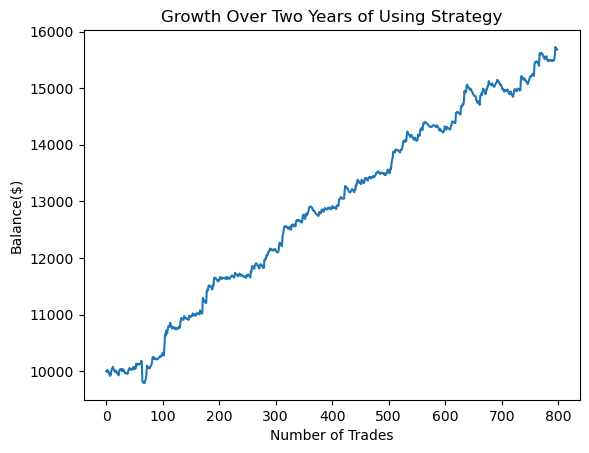

In [37]:
# Setting variables and lists
balance = 10000
win_count, loss_count, total_count = 0, 0, 0 
balance_points = [10000]
g_l_list = []

for index, row in data.iterrows():
    """
    Looping through all rows of the dataframe and calculating profit or loss based on amount set for stake (1%)
    Calculates profit and loss based on recorded buy and sell value of the options retreieved
    """
    stake = balance / 100 # Calculate stake for each trade
    total_count += 1

    if row['call_buy'] == True:
        buy_price = row['call_prices'] # Buy price
        sell_price = data.at[(index+1, 'call_prices')] # Sell price
        p_l = sell_price - buy_price # P/L

        # Adding to counts
        if p_l > 0: 
            win_count += 1

        elif p_l < 0:
            loss_count += 1

        # Calculating gain/loss and adding to balance
        returns = p_l * 100
        new_balance = balance + returns

        data.at[index, 'return'] = returns
        data.at[index, 'wins'] = win_count
        data.at[index, 'losses'] = loss_count
        data.at[index, 'total'] = total_count
    
    elif row['put_buy'] == True:
        buy_price = row['put_prices']
        sell_price = data.at[(index+1, 'put_prices')]
        p_l = sell_price - buy_price 

        if p_l > 0:
            win_count += 1

        elif p_l < 0:
            loss_count += 1
        
        returns = p_l * 100
        new_balance = balance + returns

        data.at[index, 'return'] = returns
        data.at[index, 'wins'] = win_count
        data.at[index, 'losses'] = loss_count
        data.at[index, 'total'] = total_count
        
    else:
        continue

    balance = new_balance
    balance_points.append(balance)

# Calculting values used for summary
percent_gain = round(((balance - 10000) / 10000) * 100, 2)

columns = ['Total Gain', 'Max Balance', 'Min Balance', 'Highest Gain', 'Highest Loss', 'Average Gain', 'Win/Loss']
summary_data = [f'{percent_gain}%', f'${round(max(balance_points),2)}', f'${round(min(balance_points),2)}', f'${round(max(data["return"]), 2)}', f'${round(min(data["return"]), 2)}', f'${round(sum(data["return"])/len(data["return"]))}', f'{win_count}/{loss_count}']

summary_df = pd.DataFrame(summary_data, index=columns, columns=['Data'])

# Plotting balance and dispalying summary
plot.plot(balance_points)
plot.title('Growth Over Two Years of Using Strategy')
plot.xlabel('Number of Trades')
plot.ylabel('Balance($)')
display(summary_df)

# Exporting Results
save_pdf_path = os.path.join(RESULTS_DIR, f'{TICKER}__ema_{EMA}__window_{WINDOW}__stop_loss_{STOP_LOSS}.pdf')
save_summary_path = os.path.join(RESULTS_DIR,  f'{TICKER}__ema_{EMA}__window_{WINDOW}__stop_loss_{STOP_LOSS}.csv')

plot.savefig(save_pdf_path)
summary_df.to_csv(save_summary_path, index=False)